# newTrain

## Preparations

In [29]:
import collections
from io import StringIO

import warnings
import numpy as np
import pandas as pd
import pydotplus
import seaborn as sns
from ipywidgets import Image
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10, 8)

df_train = pd.read_csv("data/titanic_train.csv")
use_features = ["Pclass", "Age", "SibSp", "Parch", "Fare", "Sex"]
df_train['Sex'] = df_train['Sex'].map({'male': 1, 'female': 0})

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [30]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

features 'Embarked' and 'Cabin' will not be used

In [31]:
df_train["Age"].fillna(df_train["Age"].mean(), inplace=True)
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
df_train[use_features].head()

,Pclass,Age,SibSp,Parch,Fare,Sex
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


#### Survival by gender

<Axes: xlabel='Sex'>

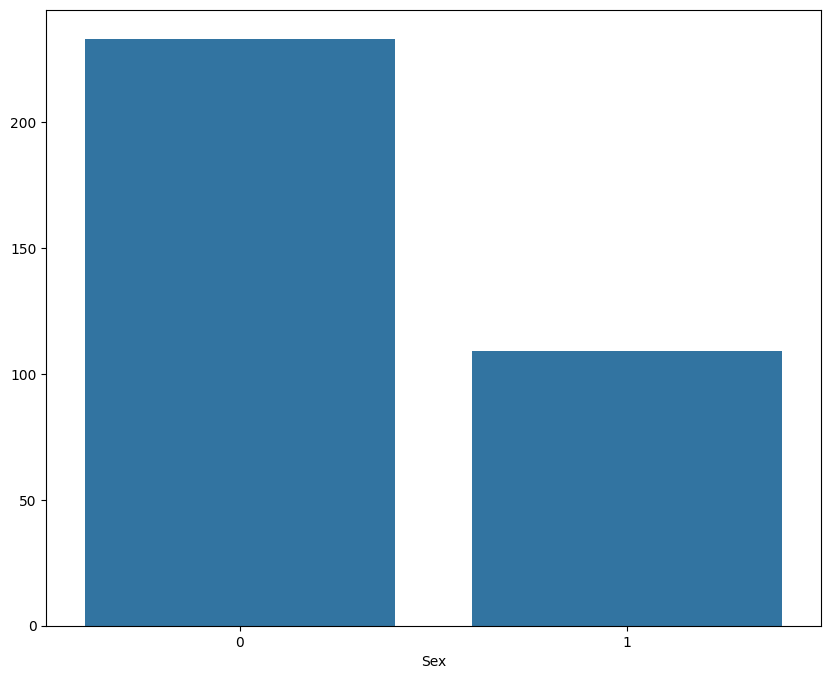

In [59]:
gender_counts = df_train["Sex"].value_counts()
sur_count = df_train[df_train["Survived"] == 1].groupby("Sex").size()
sns.barplot(x=sur_count.index, y=sur_count.values)

In [ ]:
Noted that women survived a lot more than men

#### Survival by Pclass

In [51]:
df_train["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Text(0.5, 1.0, 'Third Class Passengers')

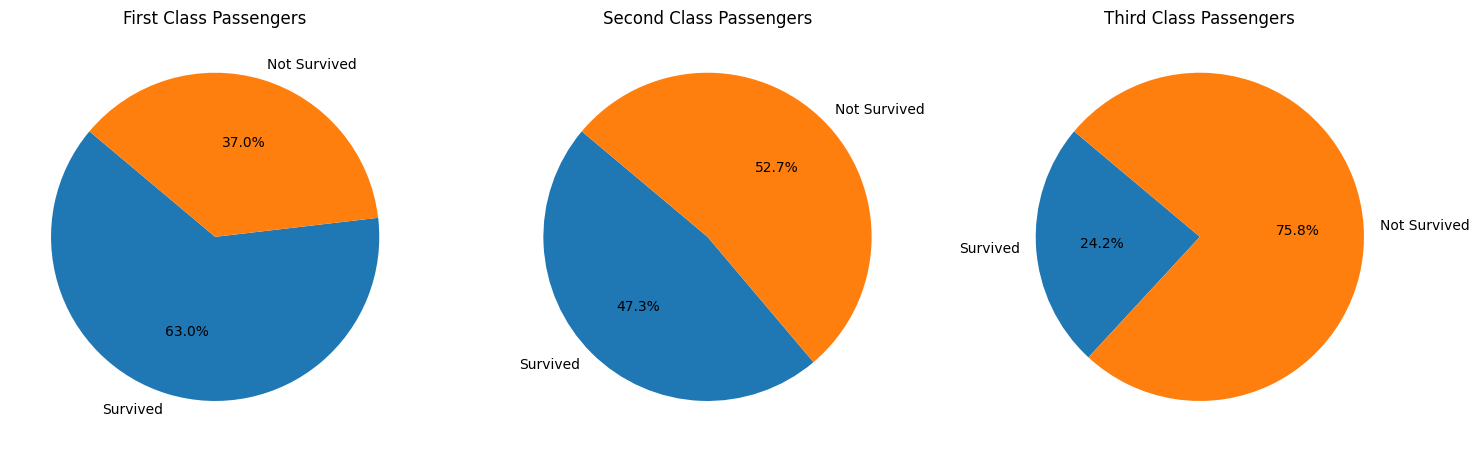

In [77]:
# count all survived and not survived passengers by class
pclass_1_passengers = df_train[df_train["Pclass"] == 1]
total_pclass_1 = pclass_1_passengers.shape[0]
survived_pclass_1 = pclass_1_passengers[pclass_1_passengers["Survived"] == 1].shape[0]
not_survived_pclass_1 = total_pclass_1 - survived_pclass_1

pclass_2_passengers = df_train[df_train["Pclass"] == 2]
total_pclass_2 = pclass_2_passengers.shape[0]
survived_pclass_2 = pclass_2_passengers[pclass_2_passengers["Survived"] == 1].shape[0]
not_survived_pclass_2 = total_pclass_2 - survived_pclass_2

pclass_3_passengers = df_train[df_train["Pclass"] == 3]
total_pclass_3 = pclass_3_passengers.shape[0]
survived_pclass_3 = pclass_3_passengers[pclass_3_passengers["Survived"] == 1].shape[0]
not_survived_pclass_3 = total_pclass_3 - survived_pclass_3


plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)  # first pie
sizes_1 = [survived_pclass_1, not_survived_pclass_1]
labels_1 = ['Survived', 'Not Survived']
plt.pie(sizes_1, labels=labels_1, autopct='%1.1f%%', startangle=140)
plt.title('First Class Passengers')

plt.subplot(1, 3, 2)  # second pie
sizes_2 = [survived_pclass_2, not_survived_pclass_2]
labels_2 = ['Survived', 'Not Survived']
plt.pie(sizes_2, labels=labels_2, autopct='%1.1f%%', startangle=140)
plt.title('Second Class Passengers')

plt.subplot(1, 3, 3)  # third pie
sizes_3 = [survived_pclass_3, not_survived_pclass_3]
labels_3 = ['Survived', 'Not Survived']
plt.pie(sizes_3, labels=labels_3, autopct='%1.1f%%', startangle=140)
plt.title('Third Class Passengers')


Noted that first class passengers survived a lot more

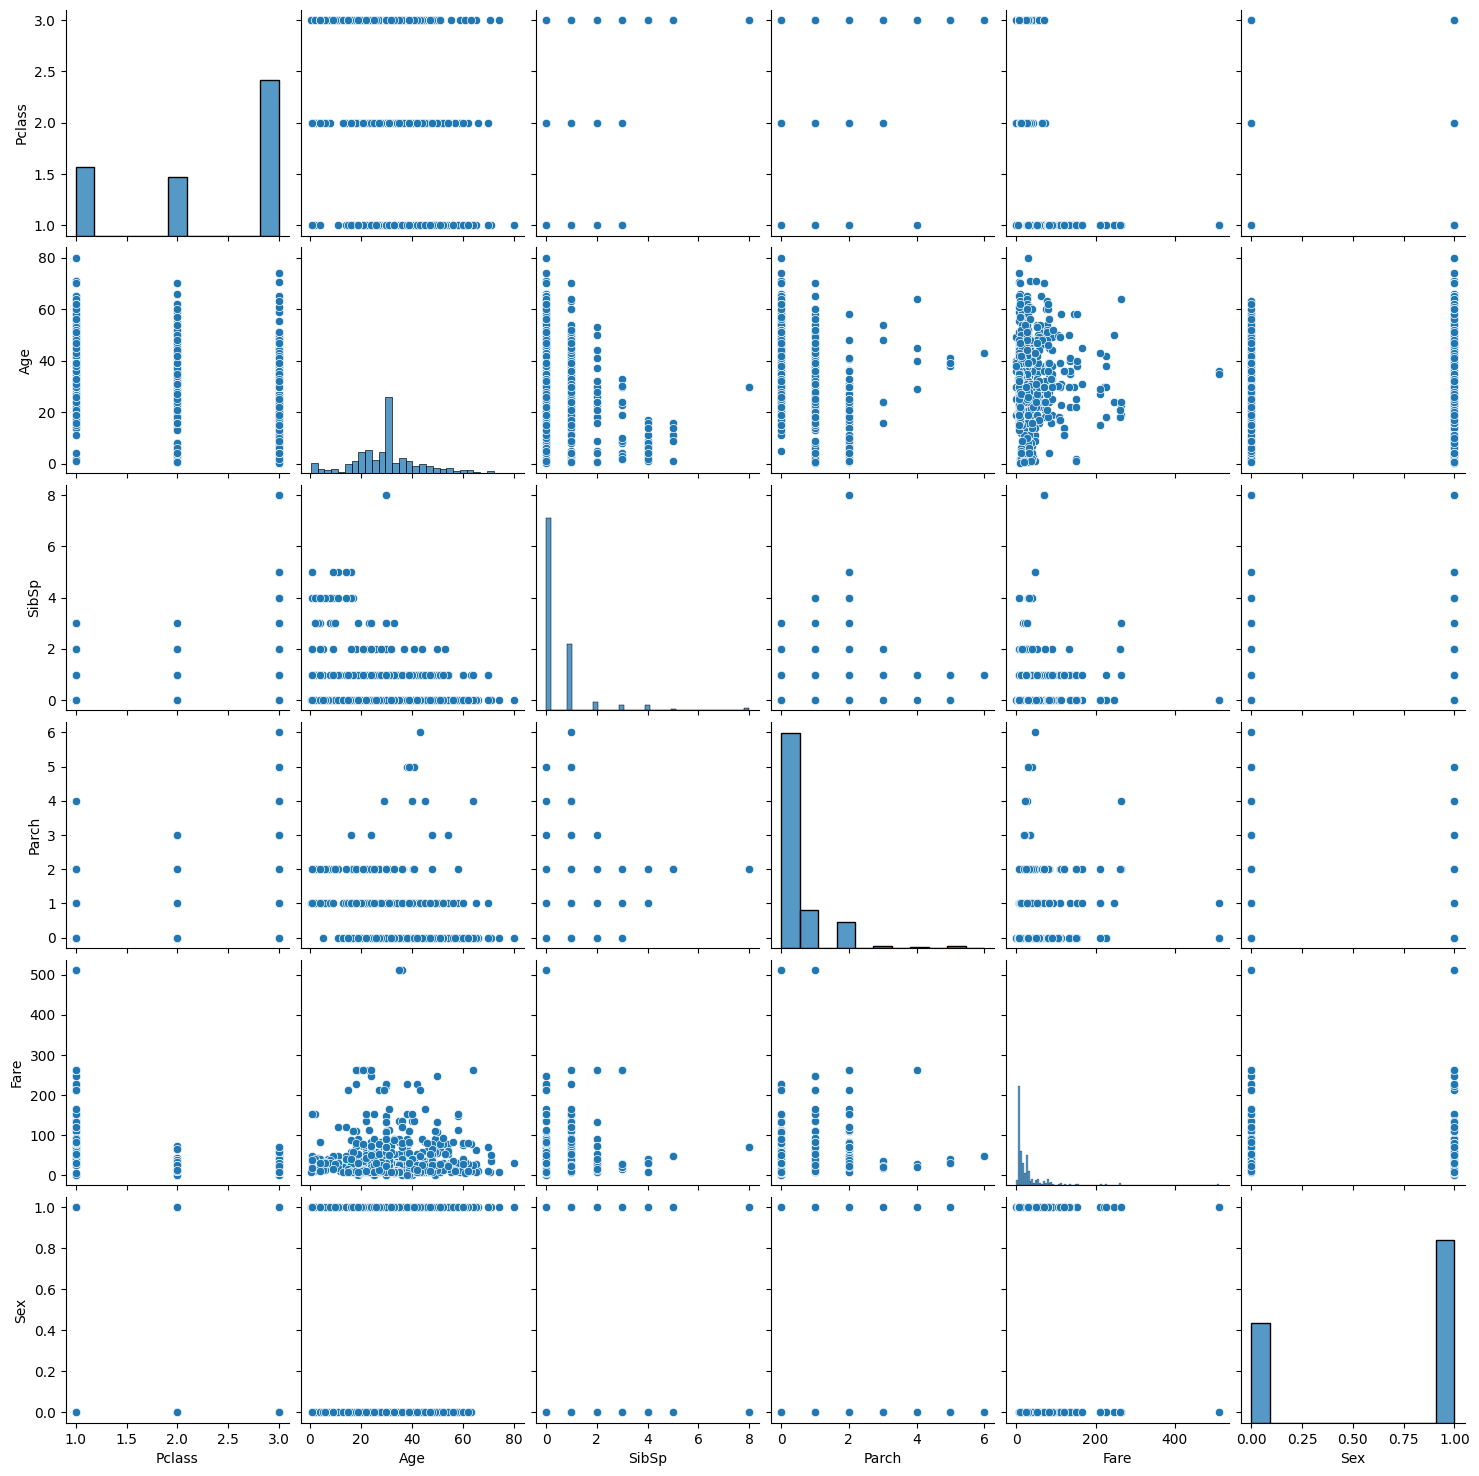

In [85]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df_train[use_features]);

¯\_(ツ)_/¯

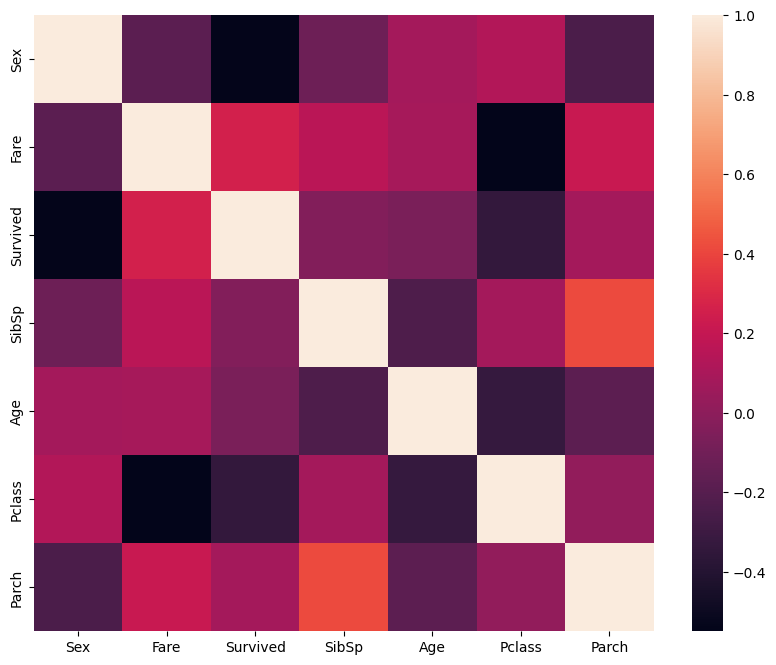

In [87]:
numerical = list(
    set(df_train.columns)
    - set(
        [
            "PassengerId",
            "Name",
            "Ticket",
            "Cabin",
            "Embarked"
        ]
    )
)

corr_matrix = df_train[numerical].corr()
sns.heatmap(corr_matrix);

In [90]:
x_train = df_train[use_features]
y_train = df_train['Survived']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=22)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.77


In [ ]:
ez accuracy 0.77